In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #A supervised model for classification purpose, multiple decision trees in training phase and combines for final product
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV - used to perform gridSearch to find the best combination of hyperparamaters for best performance on training set
from sklearn.metrics import confusion_matrix
import seaborn as sns





In [2]:
#Loading the data for the model
df = pd.read_csv("traindata.csv")

In [3]:
#weatherfeatures needed to train the model
weather_features = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'LATITUDE', 'LONGITUDE', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL', 'DEP_DEL15']
df = df[weather_features]

In [4]:
print(df)

      PRCP  SNOW  SNWD  TMAX   AWND  LATITUDE  LONGITUDE  DEP_AIRPORT_HIST  \
0     0.00   0.0   0.0  95.0   4.25    35.219    -80.936          0.273236   
1     0.00   0.0   0.0  71.0  11.41    39.774   -104.880          0.121849   
2     0.00   0.0   0.0  54.0   0.45    34.729    -92.234          0.187867   
3     0.00   0.0   0.0  64.0   8.05    32.733   -117.187          0.141446   
4     0.01   0.0   0.0  94.0  10.51    41.978    -87.906          0.193761   
...    ...   ...   ...   ...    ...       ...        ...               ...   
3047  0.00   0.0   0.0  73.0  10.96    37.619   -122.375          0.134914   
3048  0.15   0.0   0.0  49.0  10.96    45.589   -122.595          0.187867   
3049  0.00   0.0   0.0  75.0   5.82    41.978    -87.906          0.187867   
3050  0.00   0.0   0.0  45.0  13.20    33.641    -84.427          0.123710   
3051  0.27   0.0   0.0  83.0  12.30    32.894    -97.030          0.187867   

      DAY_HISTORICAL  DEP_DEL15  
0           0.222538         

In [5]:
#Preprocessing and cleaning the data, removing all the missing values
df.dropna(inplace = True)


In [6]:
print(df)

      PRCP  SNOW  SNWD  TMAX   AWND  LATITUDE  LONGITUDE  DEP_AIRPORT_HIST  \
0     0.00   0.0   0.0  95.0   4.25    35.219    -80.936          0.273236   
1     0.00   0.0   0.0  71.0  11.41    39.774   -104.880          0.121849   
2     0.00   0.0   0.0  54.0   0.45    34.729    -92.234          0.187867   
3     0.00   0.0   0.0  64.0   8.05    32.733   -117.187          0.141446   
4     0.01   0.0   0.0  94.0  10.51    41.978    -87.906          0.193761   
...    ...   ...   ...   ...    ...       ...        ...               ...   
3047  0.00   0.0   0.0  73.0  10.96    37.619   -122.375          0.134914   
3048  0.15   0.0   0.0  49.0  10.96    45.589   -122.595          0.187867   
3049  0.00   0.0   0.0  75.0   5.82    41.978    -87.906          0.187867   
3050  0.00   0.0   0.0  45.0  13.20    33.641    -84.427          0.123710   
3051  0.27   0.0   0.0  83.0  12.30    32.894    -97.030          0.187867   

      DAY_HISTORICAL  DEP_DEL15  
0           0.222538         

In [7]:
#Spliting the data into training and testing set
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
#Training set
print(X)

[[   0.            0.            0.         ...  -80.936
     0.27323574    0.22253848]
 [   0.            0.            0.         ... -104.88
     0.12184874    0.23797187]
 [   0.            0.            0.         ...  -92.234
     0.18786731    0.13988607]
 ...
 [   0.            0.            0.         ...  -87.906
     0.18786731    0.27070916]
 [   0.            0.            0.         ...  -84.427
     0.12370968    0.19897176]
 [   0.27          0.            0.         ...  -97.03
     0.18786731    0.1908767 ]]


In [9]:
#Testing set
print(y)

[0 0 0 ... 1 0 1]


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state= 40)


In [11]:
#Now getting all the data, we have to train our random forest classifier
forest_classifier =  RandomForestClassifier(random_state= 40)
#hyperparameter values to be searched during the GridSearchCV 
dict_object = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
search_Grid = GridSearchCV(forest_classifier,dict_object, cv = 10, n_jobs = -1) #njobs = no of cpu cores,cv = cross validation fold depending on your dataset
search_Grid.fit(X_train,y_train)
#getting the best estimator
forest_best_est = search_Grid.best_estimator_



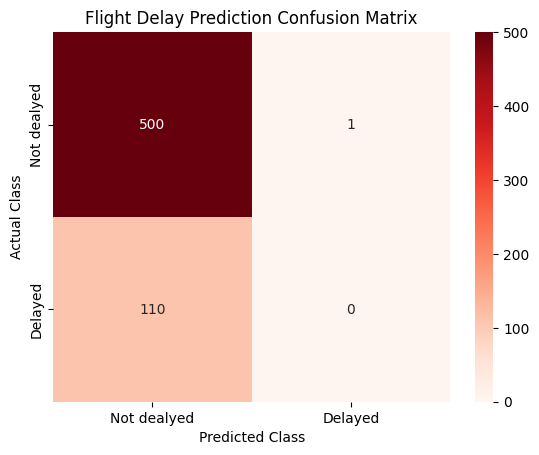

In [12]:
y_predict = forest_best_est.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_predict)
label_name = ['Not dealyed', 'Delayed']
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_name, yticklabels=label_name)
#Plotting the predicted and the actualvalues
plt.title('Flight Delay Prediction Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Show plot
plt.show()

In [13]:
#Accuracy checking
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("Classification report: ", classification_report(y_test, y_predict))

#RESUlT : Accuracy rate of 82%


Accuracy score: 0.8183306055646481
Classification report:                precision    recall  f1-score   support

           0       0.82      1.00      0.90       501
           1       0.00      0.00      0.00       110

    accuracy                           0.82       611
   macro avg       0.41      0.50      0.45       611
weighted avg       0.67      0.82      0.74       611

